In [1]:
# Import standard imports
import numpy as np
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Import library functions
from lib.solitary_funcs import (calc_surface_elevation, calc_L_scaling)

In [25]:
# Not using pip installed toolbox for the time being because making modifications to the toolbox
path_2_xBeach_toolbox = r"C:\ERDC\xbeach-toolbox"

# Import xBeach modules
try:
    import xbTools
except ImportError:
    print('**no xbTools installation found in environment, adding parent path of notebook to see if it works')
    sys.path.append(path_2_xBeach_toolbox)
    print("Path {} added".format(r"C:\ERDC\xbeach-toolbox"))

from xbTools.xbeachpost import XBeachModelAnalysis

In [66]:
# Important paths
xBeach_model_path = r"C:\ERDC\Liz_simulations\20_sol_wave_nx_16000_x_800_u_z_eta_01_tstop_250"

In [67]:
xBeach_results = XBeachModelAnalysis(fname = "foo", 
                              model_path=xBeach_model_path)

xBeach_results.get_metadata()

In [69]:
# Currently this causes the selected variable and globaltime and few other things to be loaded
# Really it should just load what you ask for 
zs = xBeach_results.get_modeloutput("zs")
time = xBeach_results.var["globaltime"]

# Load the x grid
xBeach_results.load_grid()
x_grid = xBeach_results.grd["x"][0]

loading model output coordinates from file
loading variable zs from file


In [70]:
# Set the parameters for the analytical solution
epsilon = 0.1

d0 = 1.0
g = 9.81 
L_sol = calc_L_scaling(epsilon)
x0 = -2 * L_sol

# Normalize the data
normalized_xgrid = x_grid/L_sol
normalized_zs = zs/d0

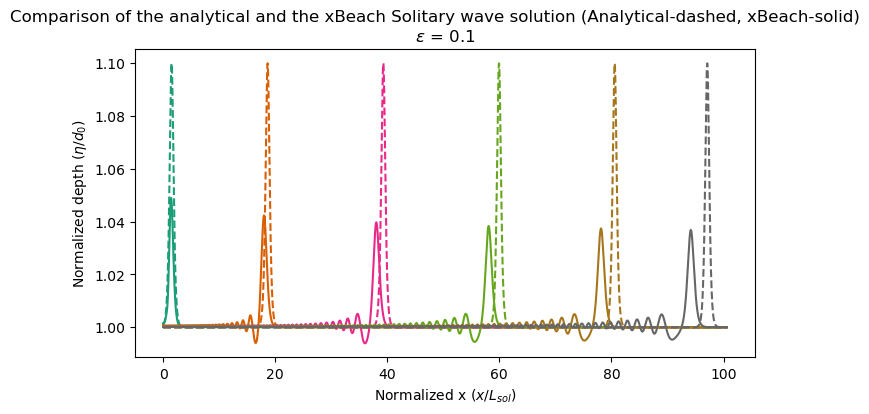

In [82]:
# Select the time indices
time_indices = [85, 500, 1000, 1500, 2000, 2400]

# Generate the figure object
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 4))

# Set the colors
viridis = plt.cm.Dark2
num_colors = len(time_indices)
colors = viridis(np.linspace(0, 1, num_colors))

# Loop over the selected time indices and plot the data
for i, time_index in enumerate(time_indices):
    # Select the time
    t = time[time_index]

    # Calc the analytical solution at that time
    analytical_eta = calc_surface_elevation(epsilon, x0, x_grid, t, g, d0)
    normalized_analy_eta = analytical_eta/d0

    # Plot the analytical solution versus the xBeach solution
    axs.plot(normalized_xgrid, normalized_analy_eta, label = "Analytical, t: {}".format(t), linestyle = "dashed",
             color=colors[i % len(colors)])
    axs.plot(normalized_xgrid, zs[time_index][0], label = "xBeach, t: {}".format(t), 
             color=colors[i % len(colors)])
    axs.set_title(r"$\epsilon$ = {}".format(epsilon))

# Format the plot
axs.set_xlabel(r"Normalized x ($x/L_{sol}$)")
axs.set_ylabel(r"Normalized depth ($\eta/d_{0}$)")
# axs.legend()

plt.suptitle("Comparison of the analytical and the xBeach Solitary wave solution (Analytical-dashed, xBeach-solid)")
plt.show()